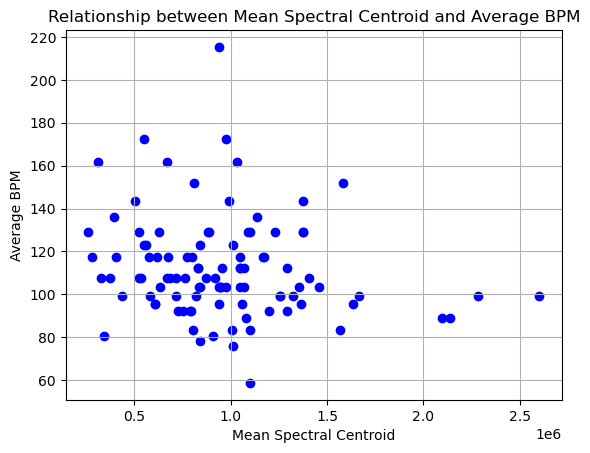

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
data = np.loadtxt('/Users/jnaysha/Desktop/Naysha\'s work/Courses/Physics/Music Machine Learning/Results/results_pop.txt', delimiter='\t')

# Convert data to numpy arrays
data = np.array(data)

# Extract dependent variable (Average_BPM)
y = data[:, 0]

# Extract independent variable (Mean_Spectral_Centroid)
X = data[:, 6]

# Plot the data
plt.scatter(X, y, color='blue')
plt.title('Relationship between Mean Spectral Centroid and Average BPM')
plt.xlabel('Mean Spectral Centroid')
plt.ylabel('Average BPM')
plt.grid(True)
plt.show()


### Simple Linear Regression

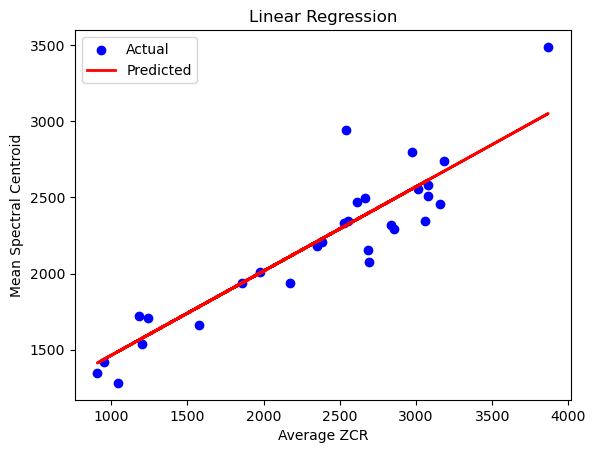

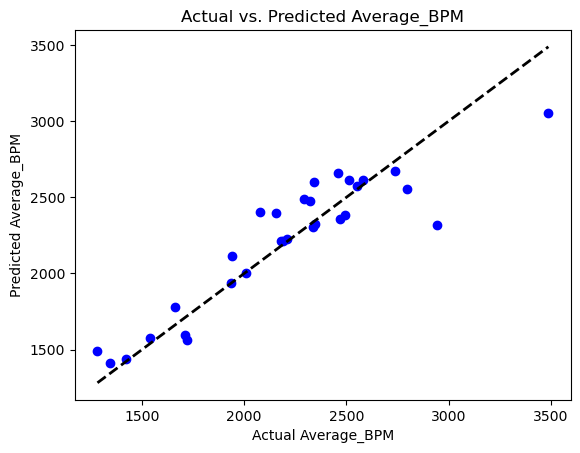

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the data from the file
data = np.loadtxt('/Users/jnaysha/Desktop/Naysha\'s work/Courses/Physics/Music Machine Learning/Results/results_rock.txt', delimiter='\t')

# Extract the independent variable (Mean_RMS_Energy) and dependent variable (Average_BPM)
X = data[:, 3].reshape(-1, 1)  # Average ZCR
y = data[:, 5]  # Mean Spectral Centroid

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #fitting better when testing on bigger dataset 

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the data and the linear regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average ZCR')
plt.ylabel('Mean Spectral Centroid')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference

plt.xlabel('Actual Mean Spectral Centroid')
plt.ylabel('Predicted Mean Spectral Centroid')
plt.title('Actual vs. Predicted Mean Spectral Centroid')
plt.show()


### Multiple Linear Regression

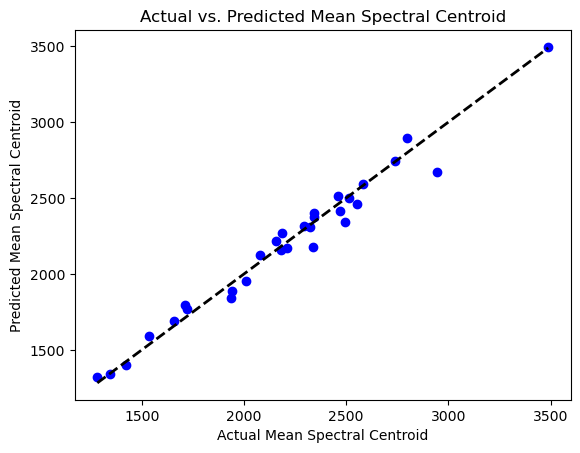

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data from the file
data = np.loadtxt('/Users/jnaysha/Desktop/Naysha\'s work/Courses/Physics/Music Machine Learning/Results/results_rock.txt', delimiter='\t', skiprows=1)

# Extract the independent variables and dependent variable 
X = data[:, [3,7,13]] # Average ZCR, Mean Spectral Centroid, Mean Spectral Bandwidth
y = data[:, 5]  # Mean Spectral Centroid

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) #plotting the line of best fit and 'k--' is the dashed black line
plt.xlabel('Actual Mean Spectral Centroid')
plt.ylabel('Predicted Mean Spectral Centroid')
plt.title('Actual vs. Predicted Mean Spectral Centroid')
plt.show()

In [12]:
df = pd.read_csv('/Users/jnaysha/Desktop/Naysha\'s work/Courses/Physics/Music Machine Learning//Results/results_pop.txt', delimiter='\t')
df.head()

,#Average_BPM,BPM_Variance,Median_BPM,Average_ZCR,ZCR_Variance,Mean_Spectral_Centroid,Variance_Spectral_Centroid,Mean_Spectral_Bandwidth,Variance_Spectral_Bandwidth,Mean_Spectral_Rolloff,Variance_Spectral_Rolloff,Mean_RMS_Energy,Variance_RMS_Energy,Mean_Chroma_STFT,Variance_Chroma_STFT,Median_Chroma_STFT,Harmonic_Freq_Mean,Harmonic_Freq_Var,Harmonic_Amplitude_Mean,Harmonic_Amplitude_Variance
0,83.354335,797.827564,172.265625,2251.766667,72732.495556,2682.284141,8.052991e+05,2923.967729,190731.575421,5956.078988,3.896393e+06,0.157902,0.002739,0.377612,0.002721,0.376074,5564.606646,1.022408e+07,42.158833,13507.185442
1,99.384014,3.511887,99.384014,3033.466667,27086.568889,2835.119375,4.375327e+05,2731.752387,163886.609325,5944.979313,2.066063e+06,0.139896,0.002499,0.423036,0.004177,0.411541,5515.430453,1.014704e+07,48.294109,9589.167281
2,95.703125,0.000000,95.703125,5054.333333,23077.268889,4225.461048,1.637053e+06,3404.380733,105212.009847,8483.382577,2.099240e+06,0.097861,0.002146,0.426769,0.002444,0.423487,5538.289146,1.014888e+07,30.453657,3670.679708
3,75.999540,1283.540033,75.999540,2287.666667,49619.775556,2525.591959,1.009068e+06,2848.409561,276177.417365,5552.801896,4.962315e+06,0.195626,0.007856,0.334962,0.007773,0.319811,5558.237328,1.003949e+07,56.468547,21702.406589
4,95.703125,0.000000,95.703125,3285.500000,93840.006667,3070.672741,6.090035e+05,2975.765677,125019.755318,6653.076965,2.280586e+06,0.203093,0.006338,0.357630,0.007342,0.346994,5533.432945,1.012587e+07,69.216835,22309.846804
